In [1]:
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [2]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

from importlib.metadata import version
import pixellib

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


In [3]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/biden_and_trump.jpg'  
img_orig = cv2.imread(img_path) 

In [4]:
img_orig.shape

(1916, 3406, 3)

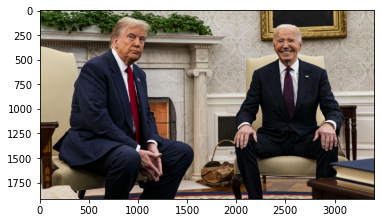

In [5]:
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))


In [6]:
plt.show()

In [7]:
print(img_orig.shape)

(1916, 3406, 3)


In [8]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7af8d1a3a520>)

In [9]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [10]:
segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [11]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

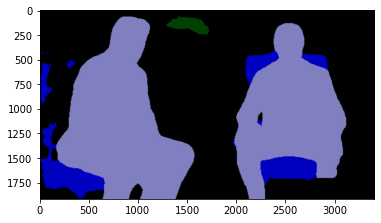

In [12]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [13]:
print(output.shape)
output

(1916, 3406, 3)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [14]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0,  9, 15, 16]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [15]:
segvalues['masks'].shape

(1916, 3406)

In [16]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])   

background
chair
person
pottedplant


In [17]:
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력    

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [18]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [19]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(1916, 3406)


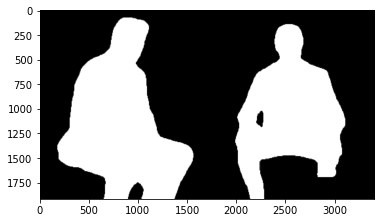

In [20]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

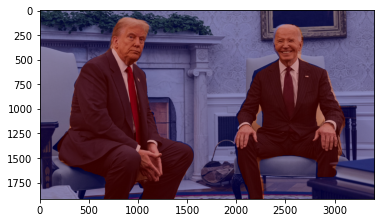

In [21]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

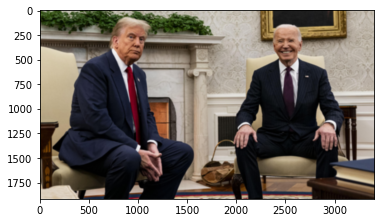

In [22]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

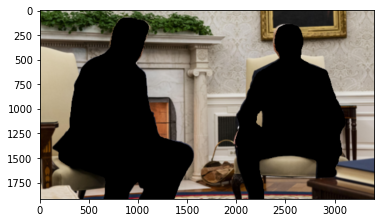

In [23]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()


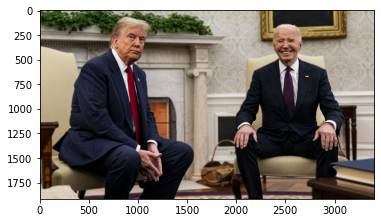

In [24]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

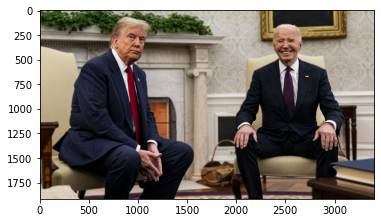

In [25]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_concat = np.where(np.expand_dims(np.all(output==seg_color, axis=-1),2), img_orig, img_orig_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 아웃포커싱 효과가 적용된 인물모드 사진과 동물 사진, 배경전환 크로마키사진

length of label names: 21
colormap: [[  0   0   0]
 [128   0   0]
 [  0 128   0]
 [128 128   0]
 [  0   0 128]
 [128   0 128]
 [  0 128 128]
 [128 128 128]
 [ 64   0   0]
 [192   0   0]
 [ 64 128   0]
 [192 128   0]
 [ 64   0 128]
 [192   0 128]
 [ 64 128 128]
 [192 128 128]
 [  0  64   0]
 [128  64   0]
 [  0 192   0]
 [128 192   0]]
background
chair
person
pottedplant
(1916, 3406)


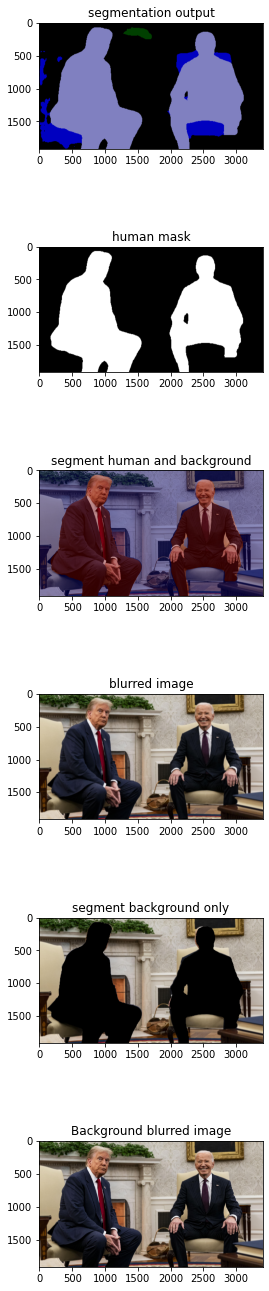

In [26]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/biden_and_trump.jpg'  
#라벨 이름 사전 정의
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
print("length of label names:", len(LABEL_NAMES))

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

print("colormap:", colormap[:20]) #생성한 20개의 컬러맵 출력
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

def segment_human(img_path=img_path,
                   model=model,
                   blur_kernel=(13,13),
                   figsize=(4,24)):
    # blur_kernel=(13,13)
    img_orig = cv2.imread(img_path)
    segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
    #segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
    fig, ax = plt.subplots(6,1, figsize=figsize)
    ax[0].imshow(output)
    ax[0].set_title("segmentation output")

    #segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
    for class_id in segvalues['class_ids']:
        print(LABEL_NAMES[class_id])

    # output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
    # seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
    # cmap 값을 변경하면 다른 색상으로 확인이 가능함
    seg_map = np.all(output==seg_color, axis=-1) 
    print(seg_map.shape) 
    ax[1].imshow(seg_map, cmap='gray')
    ax[1].set_title("human mask")

    # 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
    img_show = img_orig.copy()
    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255
    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    # 원본 이미지와 마스트를 적당히 합쳐봅니다
    # 0.6과 0.4는 두 이미지를 섞는 비율입니다.
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
    ax[2].imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    ax[2].set_title("segment human and background")

    # (13,13)은 blurring kernel size를 뜻합니다
    # 다양하게 바꿔보세요
    img_orig_blur = cv2.blur(img_orig, blur_kernel)
    # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
    # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
    ax[3].imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
    ax[3].set_title("blurred image")


    # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
    # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    # cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
    # 연산을 하고 나면 배경은 255 사람은 0입니다.
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    # cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
    # 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
    # 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    ax[4].imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
    ax[4].set_title("segment background only")

    # np.where(조건, 참일때, 거짓일때)
    # 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
    # 아닌 영역은 블러된 이미지 값을 사용합니다.
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    # plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
    # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
    # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
    ax[5].imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    ax[5].set_title("Background blurred image")

    plt.show()

segment_human(img_path=img_path,
               model=model,
               blur_kernel=(13,13))

## 인물사진 

background
chair
person
pottedplant
(1916, 3406)


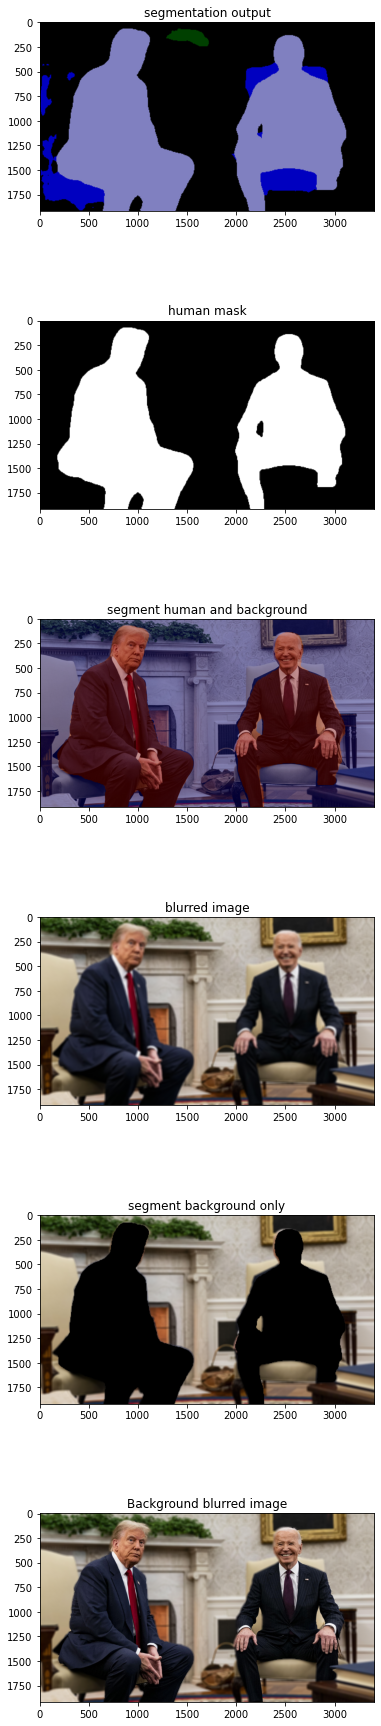

In [27]:
blur_kernel=(25,25)
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/biden_and_trump.jpg'
segment_human(img_path=img_path,
             model=model,
             blur_kernel=blur_kernel,
             figsize=(6,32))

background
person
(456, 683)


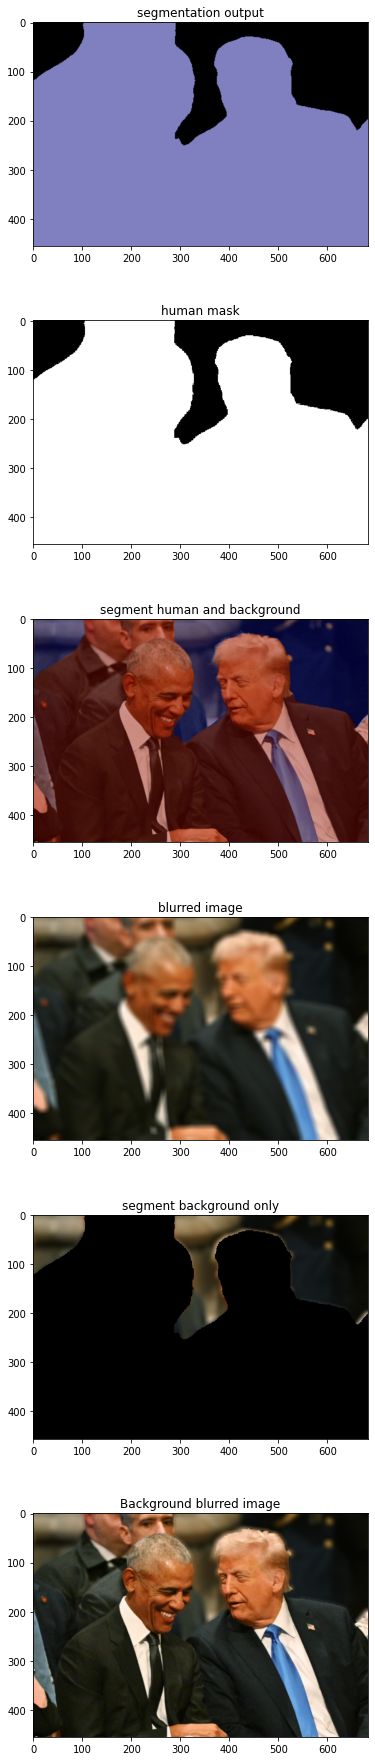

In [28]:
blur_kernel=(13,13)
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/trump_and_obama.png'
segment_human(img_path=img_path,
             model=model,
             blur_kernel=blur_kernel,
             figsize=(6,32))

background
person
(720, 1280)


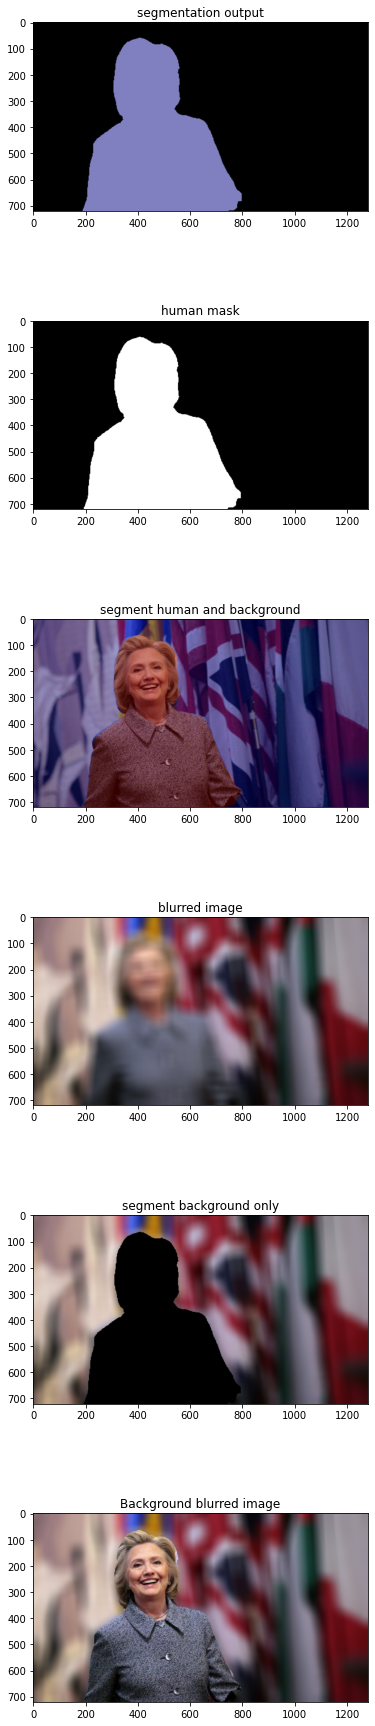

In [29]:
blur_kernel=(50,50)
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/clinton.jpg'
segment_human(img_path=img_path,
             model=model,
             blur_kernel=blur_kernel,
             figsize=(6,32))

## 동물 사진

length of label names: 21
colormap: [[  0   0   0]
 [128   0   0]
 [  0 128   0]
 [128 128   0]
 [  0   0 128]
 [128   0 128]
 [  0 128 128]
 [128 128 128]
 [ 64   0   0]
 [192   0   0]
 [ 64 128   0]
 [192 128   0]
 [ 64   0 128]
 [192   0 128]
 [ 64 128 128]
 [192 128 128]
 [  0  64   0]
 [128  64   0]
 [  0 192   0]
 [128 192   0]]
seg_index: 8
cat color: [64  0  0]
(0, 0, 64)
background
cat
(4032, 3024)


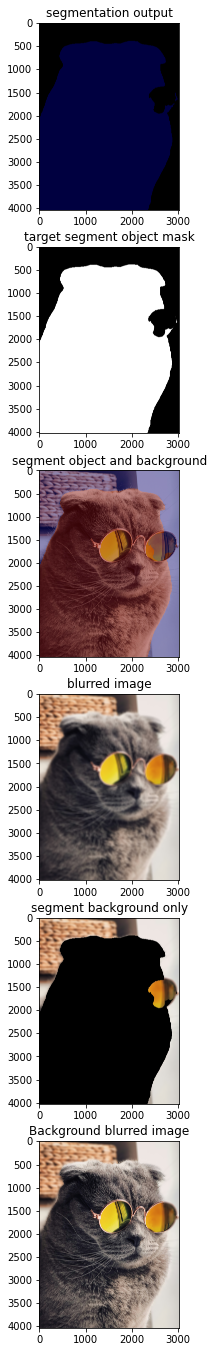

In [30]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat_with_sunglasses.jpg'  
#라벨 이름 사전 정의
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
print("length of label names:", len(LABEL_NAMES))

def get_seg_color(label_name=None):

    #컬러맵 만들기 
    colormap = np.zeros((256, 3), dtype = int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    print("colormap:", colormap[:20]) #생성한 20개의 컬러맵 출력
    seg_index = None
    for i, j in enumerate(LABEL_NAMES):
        if j == label_name:
            seg_index = i
            print("seg_index:", seg_index)

    if (type(seg_index)!=int):
        raise AssertionError(f"seg index should be type int, but {seg_index} is not int")
    elif ((seg_index>=len(LABEL_NAMES)) or (seg_index<0)):
        raise AssertionError(f"indexError : seg_index :{seg_index} is not in the valid range, valid range should be 0~{len(LABEL_NAMES)-1}")

    print(f"{label_name} color:", colormap[seg_index])
    # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
    seg_color = colormap[seg_index]
    seg_color_n = tuple([seg_color[2], seg_color[1], seg_color[0]])

    print(seg_color_n)
    return seg_color_n

seg_color = get_seg_color(label_name='cat')

def segment_object(img_path=img_path,
                   model=model,
                   seg_color=seg_color,
                   blur_kernel=(13,13),
                   figsize=(4,24)):
    # blur_kernel=(13,13)
    img_orig = cv2.imread(img_path)
    segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
    #segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
    fig, ax = plt.subplots(6,1, figsize=figsize)
    ax[0].imshow(output)
    ax[0].set_title("segmentation output")

    #segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
    for class_id in segvalues['class_ids']:
        print(LABEL_NAMES[class_id])

    # output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
    # seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
    # cmap 값을 변경하면 다른 색상으로 확인이 가능함
    seg_map = np.all(output==seg_color, axis=-1) 
    print(seg_map.shape) 
    ax[1].imshow(seg_map, cmap='gray')
    ax[1].set_title("target segment object mask")

    # 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
    img_show = img_orig.copy()
    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255
    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    # 원본 이미지와 마스트를 적당히 합쳐봅니다
    # 0.6과 0.4는 두 이미지를 섞는 비율입니다.
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
    ax[2].imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    ax[2].set_title("segment object and background")

    # (13,13)은 blurring kernel size를 뜻합니다
    # 다양하게 바꿔보세요
    img_orig_blur = cv2.blur(img_orig, blur_kernel)
    # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
    # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
    ax[3].imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
    ax[3].set_title("blurred image")


    # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
    # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    # cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
    # 연산을 하고 나면 배경은 255 사람은 0입니다.
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    # cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
    # 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
    # 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    ax[4].imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
    ax[4].set_title("segment background only")

    # np.where(조건, 참일때, 거짓일때)
    # 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
    # 아닌 영역은 블러된 이미지 값을 사용합니다.
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    # plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
    # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
    # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
    ax[5].imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    ax[5].set_title("Background blurred image")

    plt.show()

segment_object(img_path=img_path,
               model=model,
               seg_color=seg_color,
               blur_kernel=(50,50))

colormap: [[  0   0   0]
 [128   0   0]
 [  0 128   0]
 [128 128   0]
 [  0   0 128]
 [128   0 128]
 [  0 128 128]
 [128 128 128]
 [ 64   0   0]
 [192   0   0]
 [ 64 128   0]
 [192 128   0]
 [ 64   0 128]
 [192   0 128]
 [ 64 128 128]
 [192 128 128]
 [  0  64   0]
 [128  64   0]
 [  0 192   0]
 [128 192   0]]
seg_index: 12
dog color: [ 64   0 128]
(128, 0, 64)
background
chair
dog
(6000, 3742)


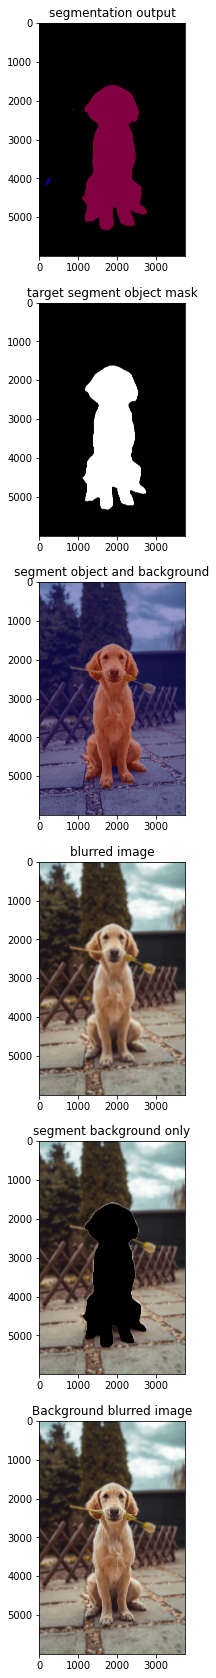

In [31]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog_holding_a_flower.jpg'
seg_color = get_seg_color(label_name='dog')
segment_object(img_path=img_path,
               model=model,
               seg_color=seg_color,
               blur_kernel=(50,50),
               figsize=(4,30))

# 크로마키 배경 이미지

length of label names: 21
colormap: [[  0   0   0]
 [128   0   0]
 [  0 128   0]
 [128 128   0]
 [  0   0 128]
 [128   0 128]
 [  0 128 128]
 [128 128 128]
 [ 64   0   0]
 [192   0   0]
 [ 64 128   0]
 [192 128   0]
 [ 64   0 128]
 [192   0 128]
 [ 64 128 128]
 [192 128 128]
 [  0  64   0]
 [128  64   0]
 [  0 192   0]
 [128 192   0]]
seg_index: 15
person color: [192 128 128]
(128, 128, 192)
img_orig shape: (1916, 3406, 3)
resized_background_img shape: (1916, 3406, 3)
background
chair
person
pottedplant
(1916, 3406)


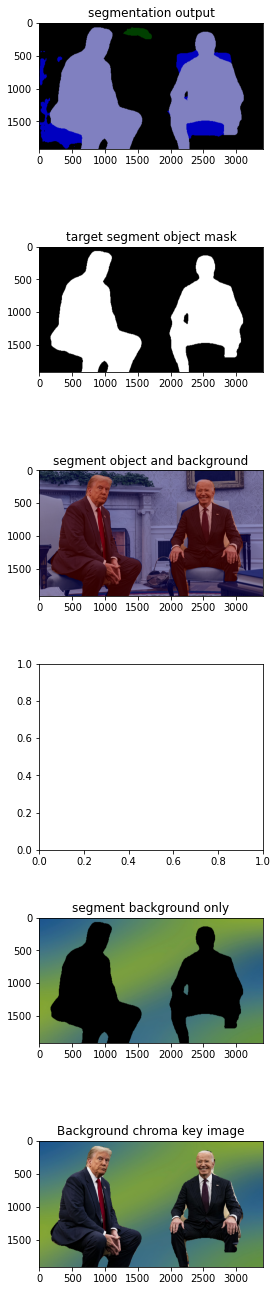

In [32]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/biden_and_trump.jpg'
background_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/background.jpg'

#라벨 이름 사전 정의
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
print("length of label names:", len(LABEL_NAMES))

def get_seg_color(label_name=None):

    #컬러맵 만들기 
    colormap = np.zeros((256, 3), dtype = int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    print("colormap:", colormap[:20]) #생성한 20개의 컬러맵 출력
    seg_index = None
    for i, j in enumerate(LABEL_NAMES):
        if j == label_name:
            seg_index = i
            print("seg_index:", seg_index)

    if (type(seg_index)!=int):
        raise AssertionError(f"seg index should be type int, but {seg_index} is not int")
    elif ((seg_index>=len(LABEL_NAMES)) or (seg_index<0)):
        raise AssertionError(f"indexError : seg_index :{seg_index} is not in the valid range, valid range should be 0~{len(LABEL_NAMES)-1}")

    print(f"{label_name} color:", colormap[seg_index])
    # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
    seg_color = colormap[seg_index]
    seg_color_n = tuple([seg_color[2], seg_color[1], seg_color[0]])

    print(seg_color_n)
    return seg_color_n

seg_color = get_seg_color(label_name='person')

def segment_object(img_path=img_path,
                   background_img_path=background_img_path,
                   model=model,
                   seg_color=seg_color,
                   blur_kernel=(13,13),
                   figsize=(4,24)):
    # blur_kernel=(13,13)
    img_orig = cv2.imread(img_path)

#     # 원래 크기 가져오기 
#     (h, w) = img_orig.shape[:2] 
#     # 원하는 너비 
#     new_width = 800 
#     # 종횡비 계산 
#     aspect_ratio = h / w 
#     new_height = int(new_width * aspect_ratio) 
#     # 이미지 크기 조정 
#     img_orig = cv2.resize(img_orig, (new_width, new_height))

    background_img = cv2.imread(background_img_path)
    resized_background_img = cv2.resize(background_img, (img_orig.shape[1], img_orig.shape[0]))
    print("img_orig shape:", img_orig.shape)
    print("resized_background_img shape:", resized_background_img.shape)
    segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
    #segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
    fig, ax = plt.subplots(6,1, figsize=figsize)
    ax[0].imshow(output)
    ax[0].set_title("segmentation output")

    #segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
    for class_id in segvalues['class_ids']:
        print(LABEL_NAMES[class_id])

    # output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
    # seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
    # cmap 값을 변경하면 다른 색상으로 확인이 가능함
    seg_map = np.all(output==seg_color, axis=-1) 
    print(seg_map.shape) 
    ax[1].imshow(seg_map, cmap='gray')
    ax[1].set_title("target segment object mask")

    # 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
    img_show = img_orig.copy()
    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255
    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    # 원본 이미지와 마스트를 적당히 합쳐봅니다
    # 0.6과 0.4는 두 이미지를 섞는 비율입니다.
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
    ax[2].imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    ax[2].set_title("segment object and background")

#     # (13,13)은 blurring kernel size를 뜻합니다
#     # 다양하게 바꿔보세요
#     img_orig_blur = cv2.blur(img_orig, blur_kernel)
#     # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
#     # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
#     # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
#     ax[3].imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
#     ax[3].set_title("blurred image")


    # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
    # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    # cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
    # 연산을 하고 나면 배경은 255 사람은 0입니다.
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    # cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
    # 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
    # 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
    img_bg_chromakey = cv2.bitwise_and(resized_background_img, img_bg_mask)
    ax[4].imshow(cv2.cvtColor(img_bg_chromakey, cv2.COLOR_BGR2RGB))
    ax[4].set_title("segment background only")

    # np.where(조건, 참일때, 거짓일때)
    # 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
    # 아닌 영역은 블러된 이미지 값을 사용합니다.
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_chromakey)
    # plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
    # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
    # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
    # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
    ax[5].imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    ax[5].set_title("Background chroma key image")

    plt.show()

segment_object(img_path=img_path,
               background_img_path=background_img_path,
               model=model,
               seg_color=seg_color,
               blur_kernel=(50,50))

# 문제점
- segmentation mask 주변에 윤곽선 blur가 생김(prob1)
- class 단위로 인식 : 
    - (심도의 문제) obama and trump 이미지처럼 더 먼 뒤에 사람이 있는 경우 시맨틱 세그멘테이션은 둘을 같은 클래스로 취급하므로, 멀리 있는 인물도 같은 심도에 있는 것처럼 부자연스럽게 보이게 됨(prob2)
    - (하나의 인스턴스로 인식하지 못함) : sunglass를 낀 고양이나 개가 문 꽃처럼 비슷한 깊이를 가지고 있지만 해당 클래스에 속하는 부분과 아닌 부분이 섞여있을 경우 하나의 instance로 인식하지 못함(prob3, prob4)
        - 깊이 추정 모델을 부가적으로 이용하고, 타겟 오브젝트와 비슷한 깊이에 있는 인접 물체를 같은 오브젝트로 포함하게 하는 방향으로 개선
    - 오브젝트 단위로 구분하는 인스턴스 세그멘테이션으로 전환하면 심도 문제는 해결될 것으로 보임
- 큰 이미지를 처리하는 속도가 느림: 실시간 처리가 어려운 문제
    - 보다 빠른 모델을 이용하거나 모델 경량화가 필요해 보임
- 블러 커널 사이즈가 adaptive하지 않음
- 크로마키 이미지에서 이미지가 잘리는 문제(prob5)

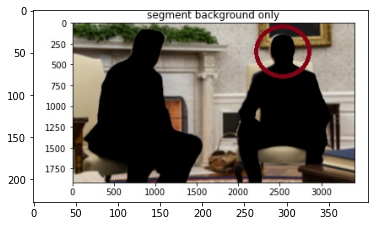

In [33]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/prob1.jpg'  
img_orig = cv2.imread(img_path) 
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))


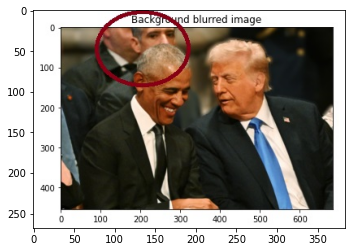

In [34]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/prob2.jpg'  
img_orig = cv2.imread(img_path) 
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))


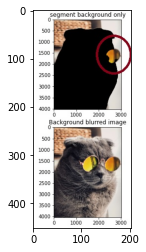

In [35]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/prob3.jpg'  
img_orig = cv2.imread(img_path) 
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))


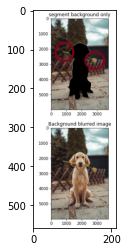

In [36]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/prob4.jpg'  
img_orig = cv2.imread(img_path) 
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))


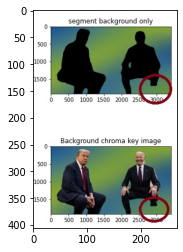

In [37]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/prob5.jpg'  
img_orig = cv2.imread(img_path) 
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))


### 회고
- instance segmentation은 객체 단위의 segmentation이 필요할 때, semantic segmentation 모델은 클래스 단위의 segmentation이 필요할 때 사용할 필요가 있다. 
- 데이터의 라벨 특성이 다르므로 모델을 선택하고 개선할 때 주의해야 한다.
- 분할 성능이 높은 세그멘테이션 모델을 사용하되, 실시간 처리가 중요한 모델에서는 성능과 효율성 사이의 tradeoff를 신경써야 한다.